In [1]:
import numpy as np
import pandas as pd

from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import seaborn as sns

np.random.seed(989)

uri = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
dados = pd.read_csv(uri)

In [2]:
dados = dados.rename(columns = {'expected_hours':'horas', 'price':'preco'})
dados['finalizado'] = dados['unfinished'].map({0:1, 1:0})

In [3]:
dados = dados[['horas','preco','finalizado']]
dados.head()

,horas,preco,finalizado
0,26,192,0
1,88,9015,0
2,89,2577,0
3,42,275,0
4,39,170,0


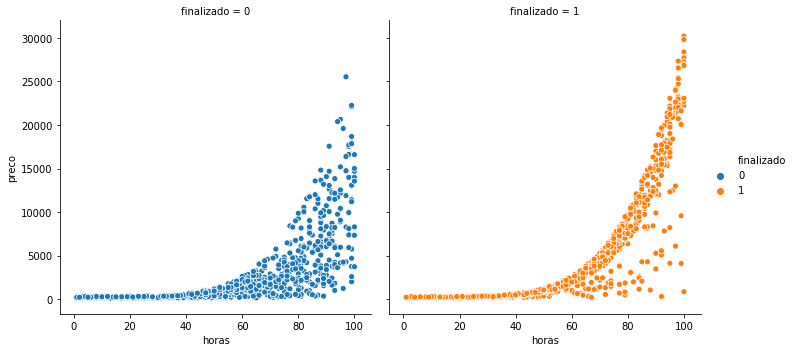

In [4]:
sns.relplot(x='horas', y='preco', data=dados, hue='finalizado', col='finalizado')

In [5]:
x = dados[['horas','preco']]
y = dados['finalizado']

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=.25, stratify=y)

In [6]:
treino_x.shape

(1617, 2)

In [7]:
model = LinearSVC()
model.fit(treino_x, treino_y)

/home/arthur/Stuff/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [8]:
previsoes = model.predict(teste_x)
score = accuracy_score(teste_y, previsoes)
print(f'A Acurácia foi {score:.2%}')

A Acurácia foi 56.85%


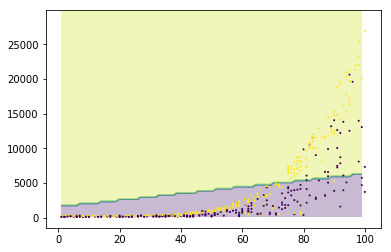

In [9]:
dominio = 100
m, M = treino_x.horas.min(), treino_x.horas.max()
pontos_x = np.arange(m,M,(M-m)/dominio)

m, M = treino_x.preco.min(), treino_x.preco.max()
pontos_y = np.arange(m,M,(M-m)/dominio)


# pontos_x['key'] = 0
# pontos_y['key'] = 0

# xy = pontos_x.merge(pontos_y, how='outer', on='key')
# xy.drop('key',1, inplace=True)
# xy


index = pd.MultiIndex.from_product([pontos_x, pontos_y], names= ['horas', 'preco'])
xy = pd.DataFrame(index = index).reset_index()

Z = model.predict(xy)
Z = Z.reshape((dominio, dominio))

# BUT WHY?!
Z = np.transpose(Z)

import matplotlib.pyplot as plt
plt.contourf(pontos_x, pontos_y, Z, alpha=.3)
plt.scatter(teste_x.horas, teste_x.preco, c=teste_y, s=1)


#Decision Boundary

# Mudando o estimador para algo não-linear

In [10]:
model = SVC()
model.fit(treino_x, treino_y)

/home/arthur/Stuff/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [11]:
previsoes = model.predict(teste_x)
score = accuracy_score(teste_y, previsoes)
print(f'A Acurácia foi {score:.2%}')

A Acurácia foi 59.44%


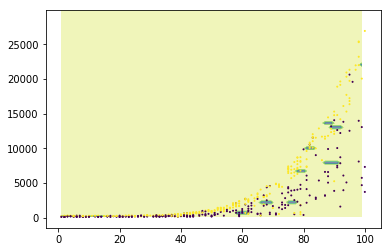

In [12]:
dominio = 100
m, M = treino_x.horas.min(), treino_x.horas.max()
pontos_x = np.arange(m,M,(M-m)/dominio)

m, M = treino_x.preco.min(), treino_x.preco.max()
pontos_y = np.arange(m,M,(M-m)/dominio)


# Outra forma de fazer esse produto cartesiano
# pontos_x['key'] = 0
# pontos_y['key'] = 0

# xy = pontos_x.merge(pontos_y, how='outer', on='key')
# xy.drop('key',1, inplace=True)
# xy


index = pd.MultiIndex.from_product([pontos_x, pontos_y], names= ['horas', 'preco'])
xy = pd.DataFrame(index = index).reset_index()

Z = model.predict(xy)
Z = Z.reshape((dominio, dominio))

# BUT WHY?!
Z = np.transpose(Z)

import matplotlib.pyplot as plt
plt.contourf(pontos_x, pontos_y, Z, alpha=.3)
plt.scatter(teste_x.horas, teste_x.preco, c=teste_y, s=1)


#Decision Boundary

# Tratando os dados para deixa-los uniformes

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(treino_x)
scaled_treino_x = scaler.transform(treino_x)
scaled_teste_x = scaler.transform(teste_x)

/home/arthur/Stuff/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/arthur/Stuff/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """
/home/arthur/Stuff/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [14]:
model = SVC()
model.fit(scaled_treino_x, treino_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [15]:
previsoes = model.predict(scaled_teste_x)
score = accuracy_score(teste_y, previsoes)
print(f'A Acurácia foi {score:.2%}')

A Acurácia foi 68.70%


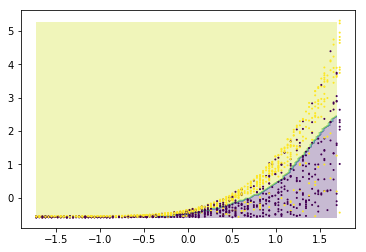

In [16]:
dominio = 100
horas = scaled_treino_x[:,0] 
m, M = horas.min(), horas.max()
pontos_x = np.arange(m,M,(M-m)/dominio)

preco = scaled_treino_x[:,1] 
m, M = preco.min(), preco.max()
pontos_y = np.arange(m,M,(M-m)/dominio)

index = pd.MultiIndex.from_product([pontos_x, pontos_y], names= ['horas', 'preco'])
xy = pd.DataFrame(index = index).reset_index()

Z = model.predict(xy)
Z = Z.reshape((dominio, dominio))

# BUT WHY?!
Z = np.transpose(Z)

import matplotlib.pyplot as plt
plt.contourf(pontos_x, pontos_y, Z, alpha=.3)
plt.scatter(horas, preco, c=treino_y, s=1)


#Decision Boundary